In [1]:
library(ggplot2)
#library(ggbiplot)
library(vegan)
library(openxlsx)
library(tidyverse)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
#install.packages("tidyverse")


In [2]:
##第 1 种模式，输入距离矩阵排序
#读取 OTU 丰度表
otu <- read.delim('otu_table.txt', row.names = 1, sep = '\t', stringsAsFactors = FALSE, check.names = FALSE)
otu <- data.frame(t(otu))

#根据物种组成计算样方距离，如 Bray-curtis 距离，详情 ?vegdist
bray_dis <- vegdist(otu, method = 'bray')      #结果以 dist 数据类型存储

#输出距离矩阵
#write.table(as.matrix(bray_dis), 'bray_distance.txt', sep = '\t', col.names = NA, quote = FALSE)



In [3]:
#或者读取已经准备好的距离矩阵文件，如 Bray-curtis 距离，排序
dis <- read.delim('bray_distance.txt', row.names = 1, sep = '\t', stringsAsFactors = FALSE, check.names = FALSE)
bray_dis <- as.dist(dis)   #转为 dist 数据类型

#NMDS 排序，定义 2 个维度，详情 ?metaMDS
nmds_dis <- metaMDS(bray_dis, k = 2)



Run 0 stress 0.171618 
Run 1 stress 0.1771618 
Run 2 stress 0.1901078 
Run 3 stress 0.1901078 
Run 4 stress 0.1927199 
Run 5 stress 0.1856777 
Run 6 stress 0.171618 
... New best solution
... Procrustes: rmse 0.0003270968  max resid 0.001447865 
... Similar to previous best
Run 7 stress 0.1900407 
Run 8 stress 0.2038451 
Run 9 stress 0.171618 
... Procrustes: rmse 0.0003348521  max resid 0.00148027 
... Similar to previous best
Run 10 stress 0.1900407 
Run 11 stress 0.1927199 
Run 12 stress 0.1927239 
Run 13 stress 0.1900407 
Run 14 stress 0.1900407 
Run 15 stress 0.171618 
... New best solution
... Procrustes: rmse 0.0001417853  max resid 0.0006296013 
... Similar to previous best
Run 16 stress 0.1715274 
... New best solution
... Procrustes: rmse 0.005179678  max resid 0.02300298 
Run 17 stress 0.1900407 
Run 18 stress 0.1936327 
Run 19 stress 0.1771618 
Run 20 stress 0.1927199 
*** No convergence -- monoMDS stopping criteria:
    18: stress ratio > sratmax
     2: scale factor of th

In [5]:
nmds_dis$stress

[1] 0.1715274

species scores not available



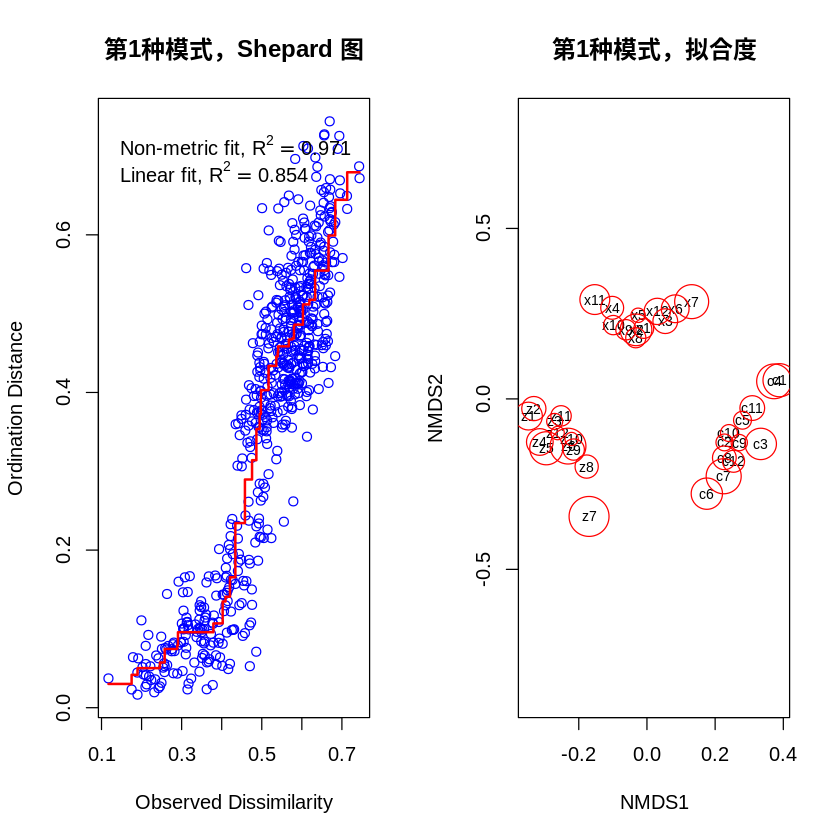

In [6]:
#样方得分
nmds_dis_site <- data.frame(nmds_dis$points)
#write.table(nmds_dis_site, 'nmds_dis_site.txt', sep = '\t', col.names = NA, quote = FALSE)

#由于物种变量在距离矩阵的计算过程中丢失，因此若想补充物种变量
#物种变量可通过丰度加权平方被动添加至排序图中，详情 ?wascores
nmds_dis_species <- wascores(nmds_dis$points, otu)
#write.table(nmds_dis_species, 'nmds_dis_species.txt', sep = '\t', col.names = NA, quote = FALSE)

#NMDS 评估，拟合 R2 越大越合理；气泡图越小越合理
par(mfrow = c(1, 2))
stressplot(nmds_dis, main = '第1种模式，Shepard 图')
gof <- goodness(nmds_dis)
plot(nmds_dis,type = 'text', main = '第1种模式，拟合度')
points(nmds_dis, display = 'site', cex = gof * 100, col = 'red')

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1644649 
Run 1 stress 0.1644649 
... Procrustes: rmse 3.98863e-05  max resid 0.000147499 
... Similar to previous best
Run 2 stress 0.1644649 
... Procrustes: rmse 3.345003e-05  max resid 0.0001230816 
... Similar to previous best
Run 3 stress 0.2270387 
Run 4 stress 0.2342095 
Run 5 stress 0.1644649 
... Procrustes: rmse 2.502302e-05  max resid 9.233713e-05 
... Similar to previous best
Run 6 stress 0.2262124 
Run 7 stress 0.1644649 
... New best solution
... Procrustes: rmse 1.35313e-05  max resid 4.962402e-05 
... Similar to previous best
Run 8 stress 0.1644649 
... Procrustes: rmse 7.644413e-06  max resid 2.666458e-05 
... Similar to previous best
Run 9 stress 0.1644649 
... Procrustes: rmse 1.402812e-06  max resid 4.403233e-06 
... Similar to previous best
Run 10 stress 0.1644649 
... Procrustes: rmse 4.683223e-05  max resid 0.0001729311 
... Similar to previous best
Run 11 stress 0.2232321 
Run 12 stress 0

[1] 0.1644649

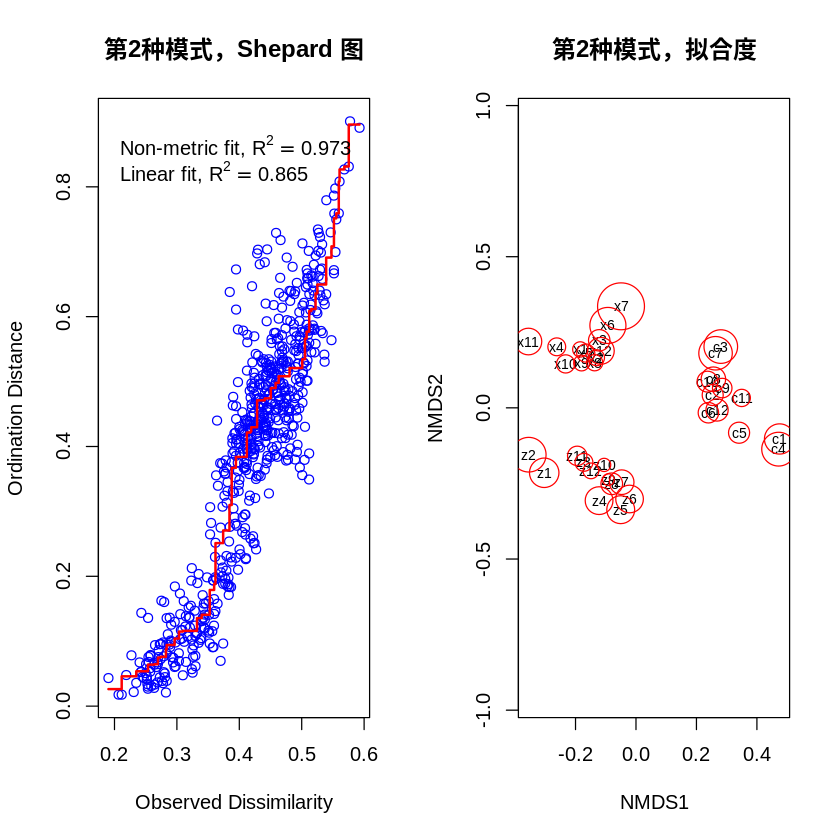

In [7]:
#############################
##第 2 种模式，直接输入 OTU 丰度表，在函数中指定距离参数排序
otu <- read.delim('otu_table.txt', row.names = 1, sep = '\t', stringsAsFactors = FALSE, check.names = FALSE)
otu <- data.frame(t(otu))

#NMDS 排序，定义 2 个维度，详情 ?metaMDS
nmds_otu <- metaMDS(otu, distance = 'bray', k = 2)

#应力函数值，一般不大于 0.2 为合理
nmds_otu$stress
#样方得分
nmds_otu_site <- data.frame(nmds_otu$points)
#write.table(nmds_otu_site, 'nmds_otu_site.txt', sep = '\t', col.names = NA, quote = FALSE)
#物种得分，这种模式下可直接计算出物种得分，具体怎么算出来的，问作者吧……
nmds_otu_species <- data.frame(nmds_otu$species)
#write.table(nmds_otu_species, 'nmds_otu_species.txt', sep = '\t', col.names = NA, quote = FALSE)

#NMDS 评估，拟合 R2 越大越合理；气泡图越小越合理
par(mfrow = c(1, 2))
stressplot(nmds_otu, main = '第2种模式，Shepard 图')
gof <- goodness(nmds_otu)
plot(nmds_otu, type = 'text', display = 'sites', main = '第2种模式，拟合度')
points(nmds_otu, display = 'site', cex = gof * 100, col = 'red')
